## Import Modules

In [28]:
#!/usr/bin/python3

import os
import sys


sys.path.append("/Users/yvonnel/ud120-projects/tools/")
sys.path.append('/Users/yvonnel/ud120-projects/choose_your_own')
sys.path.append('/Users/yvonnel/ud120-projects/svm')
os.chdir('/Users/yvonnel/ud120-projects/svm')

from email_preprocess import preprocess
from email_preprocess_1 import preprocess_one
import joblib
import numpy
import pickle
from sklearn import svm
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif
from time import time
from feature_format import featureFormat, targetFeatureSplit
dictionary = joblib.load( open("../final_project/final_project_dataset_modified.pkl", "rb") )


## Load Data

In [29]:
#!/usr/bin/python3

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).
    Draws a little scatterplot of the training/testing data
    You fill in the regression code where indicated:
"""    

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = '../tools/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit(data)

### training-testing split needed in regression, just like classification
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

## Define Functions

In [30]:
def yvonneReg(feature_train, target_train):
    reg = linear_model.LinearRegression()
    reg.fit(feature_train,target_train)
    return reg

reg = yvonneReg(feature_train, target_train)

## Plot Data
test: red | train: blue

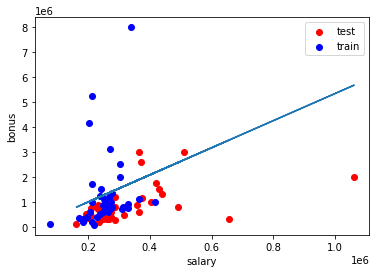

In [31]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

## Extract the Slope and Intercept

In [32]:
print('slope: ', reg.coef_)

slope:  [5.44814029]


In [33]:
print('coefficient: ', reg.intercept_)

coefficient:  -102360.54329388007


## Regression Score: Training Data
Imagine you were a less savvy machine learner, and didn’t know to test on a holdout test set. Instead, you tested on the same data that you used to train, by comparing the regression predictions to the target values (i.e. bonuses) in the training data. What score do you find? You may not have an intuition yet for what a “good” score is; this score isn’t very good (but it could be a lot worse).


In [34]:
print('r-squared score_train: ', reg.score(feature_train, target_train))

r-squared score_train:  0.04550919269952436


## Regression Score: Test Data

Now compute the score for your regression on the test data, like you know you should. What’s that score on the testing data? If you made the mistake of only assessing on the training data, would you overestimate or underestimate the performance of your regression?

In [35]:
print('r-squared score_test: ', reg.score(feature_test, target_test))

r-squared score_test:  -1.484992417368511


## Regression Bonus against LTI (long term incentive)

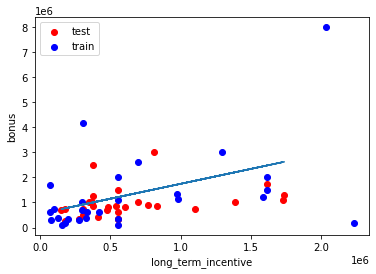

In [36]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = '../tools/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

reg = yvonneReg(feature_train, target_train)

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [37]:
print('r-squared score_test: ', reg.score(feature_test, target_test))

r-squared score_test:  -0.5927128999498643


## Outliers Break Regressions

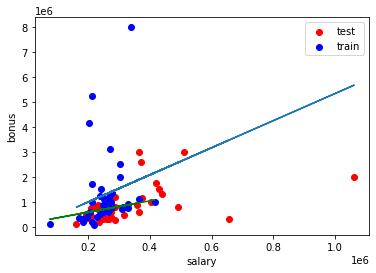

In [38]:
#!/usr/bin/python3

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).
    Draws a little scatterplot of the training/testing data
    You fill in the regression code where indicated:
"""    

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = '../tools/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

reg = yvonneReg(feature_train, target_train)

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
reg.fit(feature_test, target_test) # line fitting on the test data(with outliers)
plt.plot(feature_train, reg.predict(feature_train), color="g") ## color green. line fitting on the train data
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [39]:
print('slope: ', reg.coef_)

slope:  [2.27410114]


The slope is about 2.27 after removing the outlier, which is a big difference from what we had before (about 5.4).  A small number of outliers makes a big difference!